2 Dimensional Array Manipulations and Equalization for Clarity images

In [1]:
#insert your own parth here
import os
os.chdir('/Users/albertlee/NeuroCV/Module1/PCV/2Dhisteq')

In [2]:
### Run below if necessary

##import sys

##sys.path.append('/usr/local/lib/python2.7/site-packages')

import math
import csv,gc
import matplotlib
import numpy as np
import cv2

#%matplotlib
BINS = 32

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage import data, img_as_float
from skimage import exposure

In [5]:
import cv2

In [6]:
from PCV import tools
from PIL import Image
from numpy import *

def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

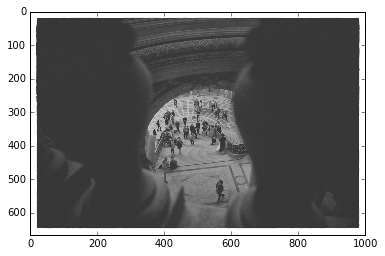

In [18]:
im = array(Image.open('2Dexample.png'))
plt.imshow(np.asarray(im))

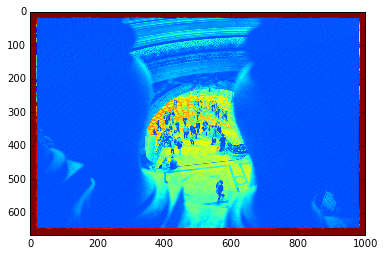

In [8]:
im = array(Image.open('2Dexample.png').convert('L'))
plt.imshow(np.asarray(im))
im2,cdf = histeq(im)

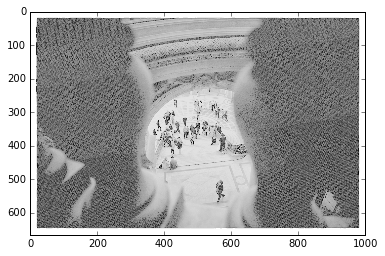

In [9]:
histeqimage = Image.fromarray(im2)
histeqimage = histeqimage.convert('RGB')
plt.imshow(np.asarray(histeqimage))

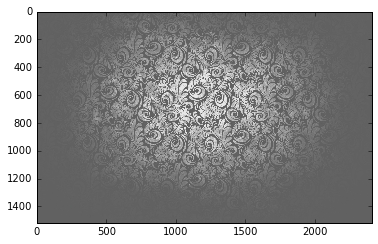

In [10]:
im = array(Image.open('alexample.png'))
plt.imshow(np.asarray(im))

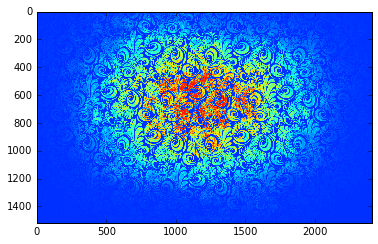

In [11]:
im = array(Image.open('alexample.png').convert('L'))
im2,cdf = histeq(im)
plt.imshow(np.asarray(im))

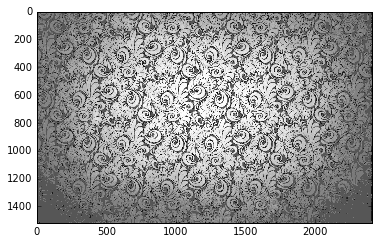

In [12]:
histeqimage = Image.fromarray(im2)
histeqimage = histeqimage.convert('RGB')
plt.imshow(np.asarray(histeqimage))

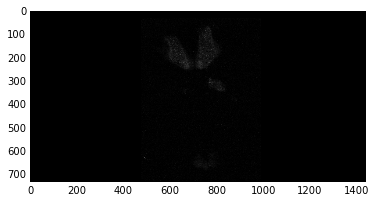

In [13]:
im = array(Image.open('Fear199.png'))
plt.imshow(np.asarray(im))

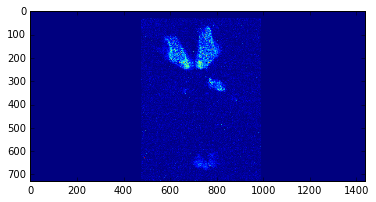

In [14]:
im = array(Image.open('Fear199.png').convert('L'))
im2,cdf = histeq(im)
plt.imshow(np.asarray(im))

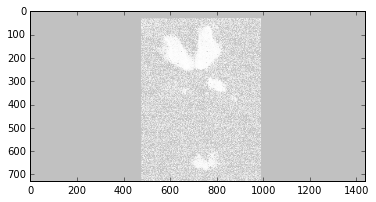

In [15]:
histeqimage = Image.fromarray(im2)
histeqimage = histeqimage.convert('RGB')
plt.imshow(np.asarray(histeqimage))

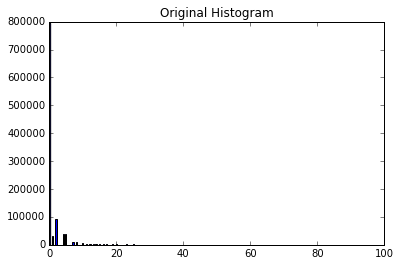

In [16]:
im = np.asarray(im)
imgflat = im.reshape(-1)
fig = plt.hist(imgflat, bins=255)
plt.title('Original Histogram')
plt.show()

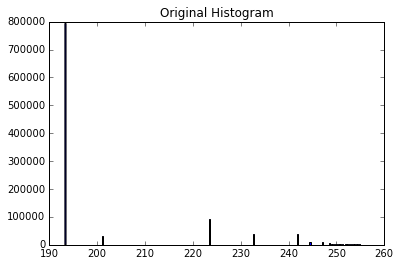

In [17]:
im = np.asarray(im2)
imgflat = im2.reshape(-1)
fig = plt.hist(imgflat, bins=255)
plt.title('Original Histogram')
plt.show()